In [9]:
import tensorflow as tf
import os
import cv2

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [3]:
len(gpus)

1

In [10]:
##important package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import tensorflow as tf
from sklearn.utils import shuffle
import glob

In [8]:
##first uploading zip file then running the following code to unzip the zip file in the content folder
import zipfile
import os
import shutil

# Path to the zip file on your Google Drive
zip_file_path = '/content/no.zip'

# Path to the desired location where you want to move the contents
desired_location = '/data/'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/data/')

# Get the name of the unzipped folder (assuming there's only one folder)
unzipped_folder_name = os.listdir('/data/')[0]

# Move the contents to the desired location
source_path = '/data/' + unzipped_folder_name
destination_path = desired_location + unzipped_folder_name

shutil.move(source_path, destination_path)

print("Unzipping and moving completed successfully!")

Unzipping and moving completed successfully!


In [15]:
os.listdir('/data')

['yes', 'no']

In [34]:
##building the data pipeline
data=tf.keras.utils.image_dataset_from_directory('/data')

Found 253 files belonging to 2 classes.


In [33]:
# ##to take 16 images in each batch
# batch_size = 16
# data_iterator = data.batch(batch_size).as_numpy_iterator()

# # Get the batch of data
# batch = data_iterator.next()

In [40]:
##to access the data pipeline
##here each batch will be having 32 images
data_iterator=data.as_numpy_iterator()
##Get the batch of data
batch=data_iterator.next()
##len-2->images, labels
len(batch)

2

In [36]:
batch[0].shape

(32, 256, 256, 3)

In [37]:
batch[0].max(),  batch[1].min()

(255.0, 0)

In [19]:
batch[1]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

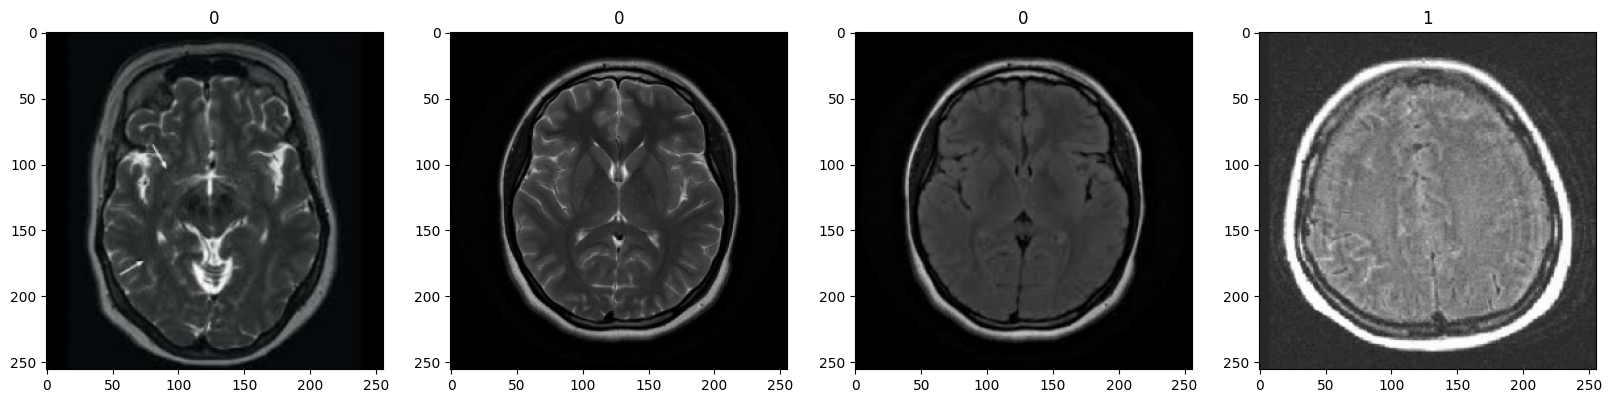

In [41]:
##from the pics we can see 0/1 is for which categories
##0->Not tumor, 1->tumor
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #taking 4 images
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [42]:
##scaling/transformation of the data in pipeline
#x->independent variable, y->target variable
data=data.map(lambda x,y:  (x/255, y))

In [43]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [44]:
batch[0].max(),  batch[0].min()

(1.0, 0.0)

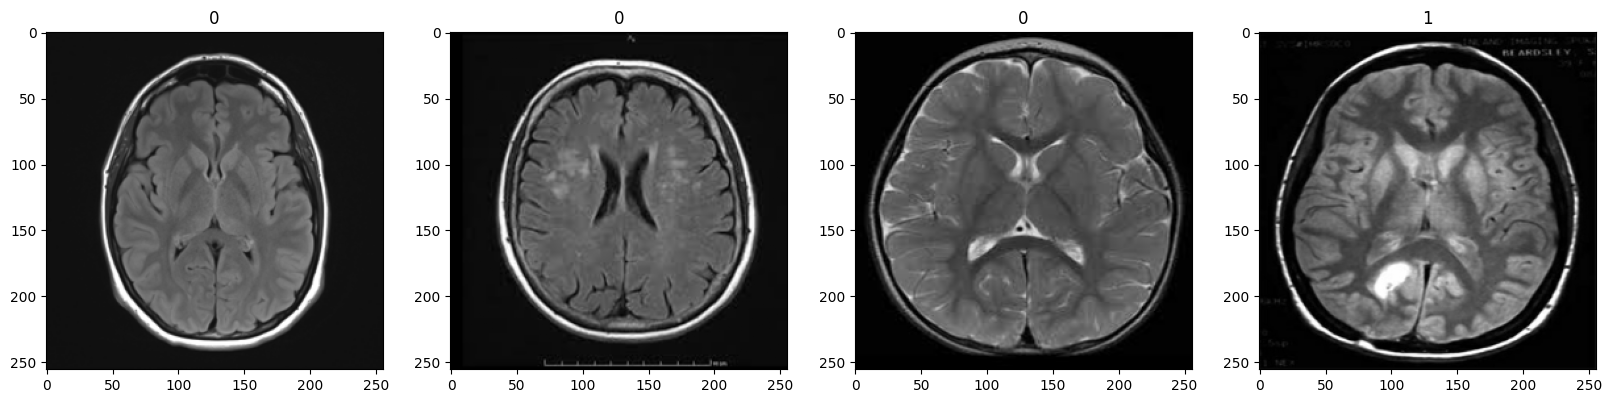

In [45]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #taking 4 images
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [46]:
##total 8 batches
len(data)

8

In [32]:
##each batch having 32 images
len(batch[0])

32

In [50]:
train_size=int(len(data)*.7) #70% of the data
val_size=int(len(data)*.2)+1 #20% of the daa
test_size=int(len(data)*.1)+1#10% of the data

In [51]:
train_size, val_size, test_size

(5, 2, 1)

In [52]:
##finally taking different batches of the data for train,validation and test
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [53]:
print(len(train), len(val), len(test))

5 2 1


#### Model creation

In [60]:
#import all the neccessary packages
from tensorflow.keras.models import Sequential #for one i/p and one o/p
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1,  activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

##fully connected layers
model.add(Dense(256,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) #we'll get single output

In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [65]:
early_stopping = EarlyStopping(patience=5, monitor='val_loss')
##fit the model
hist=model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping])

Epoch 1/50
5/5 [==============================] - 3s 240ms/step - loss: 0.8908 - accuracy: 0.5875 - val_loss: 0.4736 - val_accuracy: 0.8125
Epoch 2/50
5/5 [==============================] - 1s 164ms/step - loss: 0.5978 - accuracy: 0.6750 - val_loss: 0.5739 - val_accuracy: 0.6875
Epoch 3/50
5/5 [==============================] - 1s 203ms/step - loss: 0.5185 - accuracy: 0.8000 - val_loss: 0.5597 - val_accuracy: 0.7188
Epoch 4/50
5/5 [==============================] - 1s 148ms/step - loss: 0.5026 - accuracy: 0.8188 - val_loss: 0.4215 - val_accuracy: 0.8125
Epoch 5/50
5/5 [==============================] - 1s 148ms/step - loss: 0.5104 - accuracy: 0.7688 - val_loss: 0.4415 - val_accuracy: 0.8438
Epoch 6/50
5/5 [==============================] - 2s 360ms/step - loss: 0.4303 - accuracy: 0.8375 - val_loss: 0.3756 - val_accuracy: 0.8438
Epoch 7/50
5/5 [==============================] - 1s 152ms/step - loss: 0.4069 - accuracy: 0.8188 - val_loss: 0.3540 - val_accuracy: 0.7969
Epoch 8/50
5/5 [====

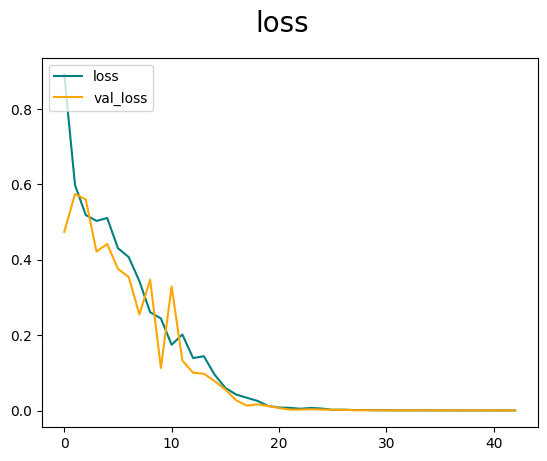

In [66]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

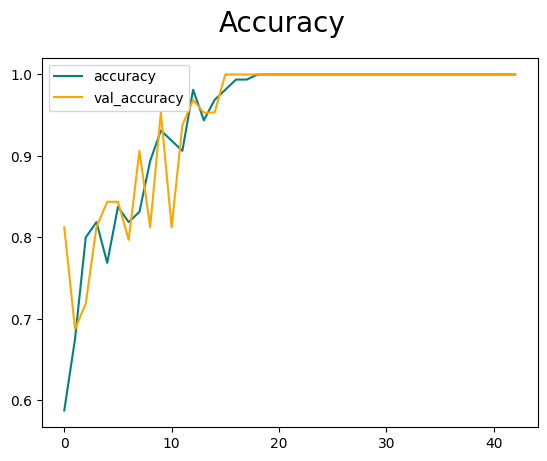

In [67]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# define metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

print(f'Precision: {precision_result}, Recall: {recall_result}, Accuracy: {accuracy_result}')


1/1 [==============================] - 0s 34ms/step
Precision: 1.0, Recall: 1.0, Accuracy: 1.0


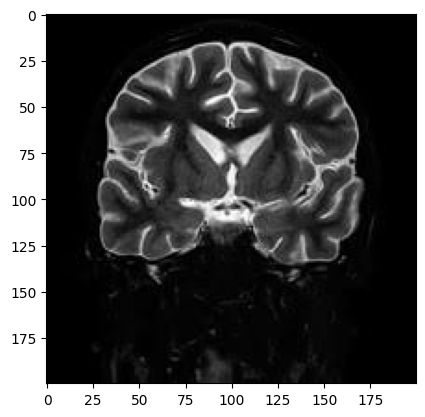

In [71]:
##Test on the new image
import cv2
img=cv2.imread('/19 no.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

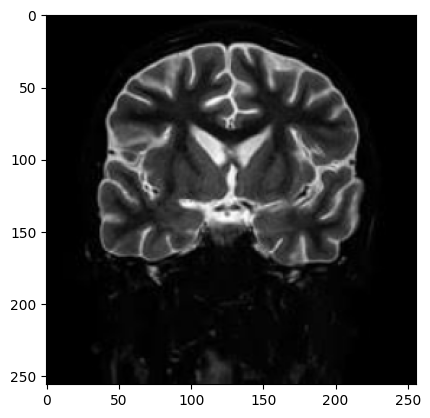

In [72]:
##making it 250x250
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
##neurons expects a bach of images not a single image
##expand_dims->by this we are putting the single image array in another array
yhat=model.predict(np.expand_dims(resize/255, 0))
if yhat>0.5:
  print(f'Predicted calss is ')
else:
  print(f'Predicted class is ')

1/1 [==============================] - 0s 302ms/step


In [74]:
yhat

array([[4.851779e-06]], dtype=float32)

In [76]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/19 no.jpg')

# resize the image to 256x256
resize = tf.image.resize(img, (256, 256))

# expand dimensions to make it a batch of one image
resize = np.expand_dims(resize / 255, 0)

# make predictions
yhat = model.predict(resize)

# Check the prediction
if yhat > 0.5:
    print(f'Predicted class is tumor')
else:
    print(f'Predicted class is non tumor')


1/1 [==============================] - 0s 48ms/step
Predicted class is non tumor


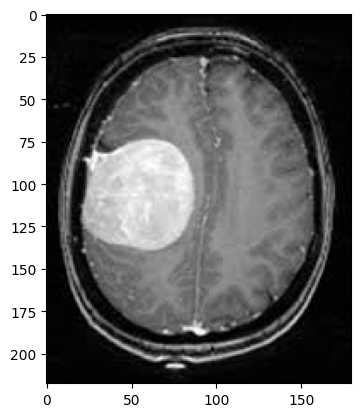

In [78]:
import cv2
img=cv2.imread('/Y1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [77]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/Y1.jpg')

# resize the image to 256x256
resize = tf.image.resize(img, (256, 256))

# expand dimensions to make it a batch of one image
resize = np.expand_dims(resize / 255, 0)

# make predictions
yhat = model.predict(resize)

# Check the prediction
if yhat > 0.5:
    print(f'Predicted class is tumor')
else:
    print(f'Predicted class is non tumor')


1/1 [==============================] - 0s 30ms/step
Predicted class is tumor


### checking model on completely new image

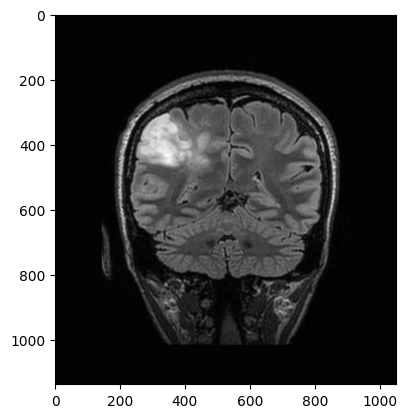

In [82]:
##checking this image
img = cv2.imread('/oligodendroglioma-banner.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [79]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/oligodendroglioma-banner.jpg')

# resize the image to 256x256
resize = tf.image.resize(img, (256, 256))

# expand dimensions to make it a batch of one image
resize = np.expand_dims(resize / 255, 0)

# make predictions
yhat = model.predict(resize)

# Check the prediction
if yhat > 0.5:
    print(f'Predicted class is tumor')
else:
    print(f'Predicted class is non tumor')


1/1 [==============================] - 0s 18ms/step
Predicted class is tumor
